In [89]:
# Dependencies
from pathlib import Path
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
import numpy as np

from config import geoapify_key

---

# Population per City

#### How does the population of a city affect the parking type?

---

In [36]:
url = "https://api.geoapify.com/v2/place-details?"

https://api.geoapify.com/v2/place-details?


In [86]:
ID = ["5151f935f90f9a5dc059ec5ce2bd750b4140f00101f901ff29030000000000c0020692030b4c6f7320416e67656c6573",
      "519bc800fa0fd857c0597523e5cbc5c63d40f00101f9018f07290000000000c00206920307486f7573746f6e",
      "517bd8384d167e52c059afb076b00e634440f00101f901a5f2260000000000c0020992030f4e657720596f726b20436f756e7479",
      "51a6c49a45e4eb55c0595a1990664ceb4440f00101f901ecde010000000000c002069203074368696361676f",
      "519bc800fa0fd857c0597523e5cbc5c63d40f00101f9018f07290000000000c00206920307486f7573746f6e",
      "512b903aab385658c059df25b52d0e644040f00101f9014ac2010000000000c0020692030a466f727420576f727468",
      "513497aaa46d0d54c059f33cfd817cc63940f00101f90101911200000000009203054d69616d69",
      "51fc8114f40e1b55c059eb5631899de14040f00101f90105d3010000000000c0020692030741746c616e7461",
      "5170bdda59bffd55c059eafb089e0f884540f00101f901c3d4030000000000c002069203094d696c7761756b6565",
      "51d80144b194c852c0590b89d6a9f9004440f00101f90176de020000000000c0020692030c5068696c6164656c70686961",
      "518ceee3f2b6055cc059373e2c342dc94040f00101f90199b2010000000000c0020692030750686f656e6978"]

features = "details,details.names"


pop_list = []

for x in ID:
    pop_dict = {}
    try:
        response = requests.get(f"{url}id={x}&features={features}&apiKey={geoapify_key}").json()
#         print(response["features"][0]["properties"]["name"], 
#               response["features"][0]["properties"]["datasource"]["raw"]["population"])
        
        pop_dict["City"] = response["features"][0]["properties"]["name"]
        pop_dict["Population"] = response["features"][0]["properties"]["datasource"]["raw"]["population"]
        pop_list.append(pop_dict)
        
    except:
        pass

In [87]:
population_df = pd.DataFrame(pop_list)
population_df

,City,Population
0,Los Angeles,4030904
1,Houston,2304580
2,New York County,1694251
3,Chicago,2746388
4,Houston,2304580
5,Fort Worth,727577
6,Atlanta,506804
7,Milwaukee,605013
8,Philadelphia,1526006
9,Phoenix,1608139


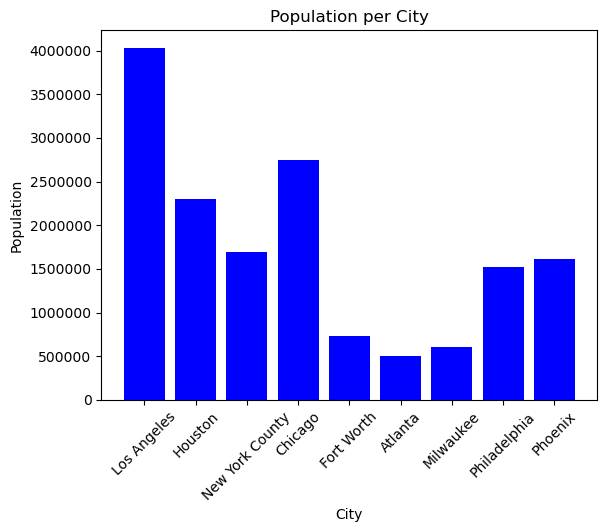

In [241]:
#Population bar chart
x = population_df["City"]
y = population_df["Population"]

plt.ticklabel_format(style='plain')
plt.bar(x, y, color="b")
plt.xticks(rotation=45)
plt.title("Population per City")
plt.xlabel("City")
plt.ylabel("Population")
plt.show()

---

# Parking Type

#### What parking type is most common in each city?

---

In [116]:
csv_file = Path("Output/All_City.csv")
city_df = pd.read_csv(csv_file)
city_df[["type", "city"]]

,type,city
0,multi-storey,New York
1,surface,New York
2,underground,New York
3,surface,New York
4,multi-storey,New York
...,...,...
316,surface,Phoenix
317,surface,Phoenix
318,surface,Phoenix
319,surface,Phoenix


In [305]:
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Fort Worth',
       'Miami', 'Atlanta', 'Milwaukee', 'Philadelphia', 'Phoenix']

type_list = []


for x in cities:
   
    type_data = city_df.loc[city_df["city"]==x]["type"]
    type_list.append(type_data)
   

## New York Parking Type

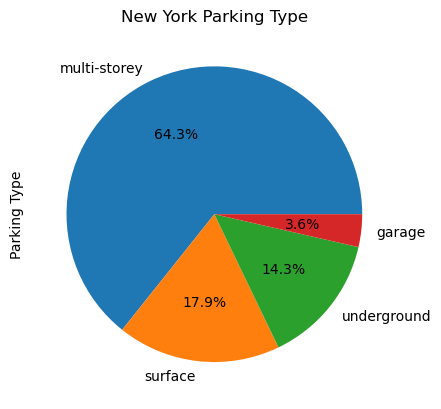

In [331]:
ny_pie = type_list[0].value_counts()
labels = type_list[0].unique()

plt.pie(ny_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("New York Parking Type")

#save to output folder
plt.savefig("Output/NewYork_Pie.png", bbox_inches='tight')

plt.show()

## Los Angeles Parking Type

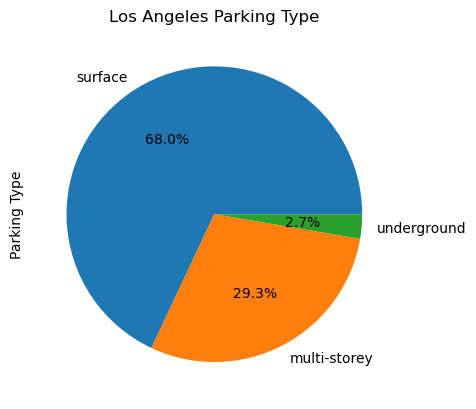

In [332]:
la_pie = type_list[1].value_counts()
labels = type_list[1].unique()

plt.pie(la_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Los Angeles Parking Type")

#save to output folder
plt.savefig("Output/LosAngeles_Pie.png", bbox_inches='tight')

plt.show()

## Chicago Parking Type

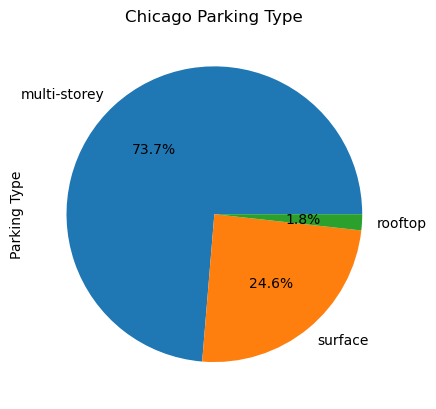

In [333]:
chicago_pie = type_list[2].value_counts()
labels = type_list[2].unique()

plt.pie(chicago_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Chicago Parking Type")

#save to output folder
plt.savefig("Output/Chicago_Pie.png", bbox_inches='tight')

plt.show()

## Houston Parking Types

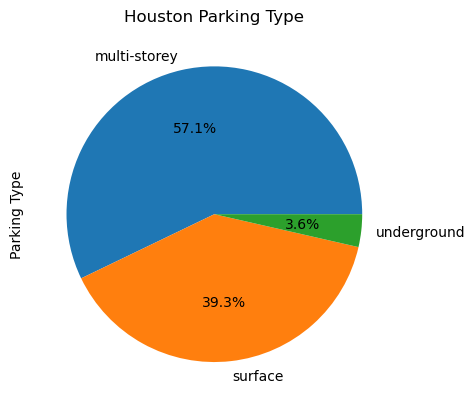

In [334]:
houston_pie = type_list[3].value_counts()
labels = type_list[3].unique()

plt.pie(houston_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Houston Parking Type")

#save to output folder
plt.savefig("Output/Houston_Pie.png", bbox_inches='tight')

plt.show()

## Fort Worth Parking Types

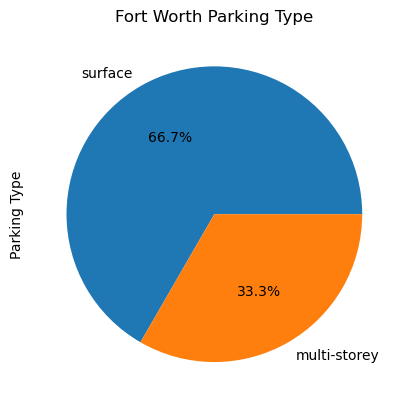

In [335]:
fw_pie = type_list[4].value_counts()
labels = type_list[4].unique()

plt.pie(fw_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Fort Worth Parking Type")

#save to output folder
plt.savefig("Output/FortWorth_Pie.png", bbox_inches='tight')

plt.show()

## Miami Parking Types

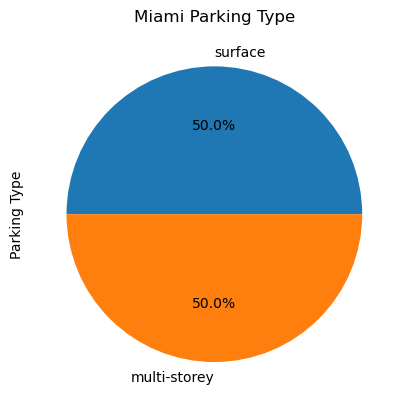

In [336]:
mi_pie = type_list[5].value_counts()
labels = type_list[5].unique()

plt.pie(mi_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Miami Parking Type")

#save to output folder
plt.savefig("Output/Miami_Pie.png", bbox_inches='tight')

plt.show()

## Atlanta Parking Types

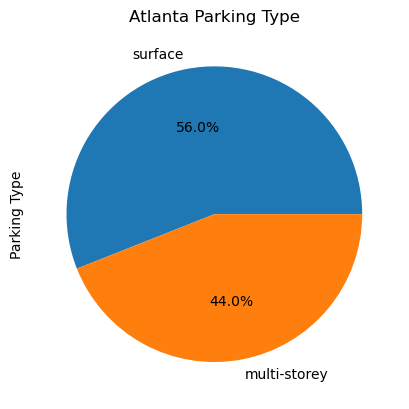

In [337]:
atl_pie = type_list[6].value_counts()
labels = type_list[6].unique()

plt.pie(atl_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Atlanta Parking Type")

#save to output folder
plt.savefig("Output/Atlanta_Pie.png", bbox_inches='tight')

plt.show()

## Milwaukee Parking Types

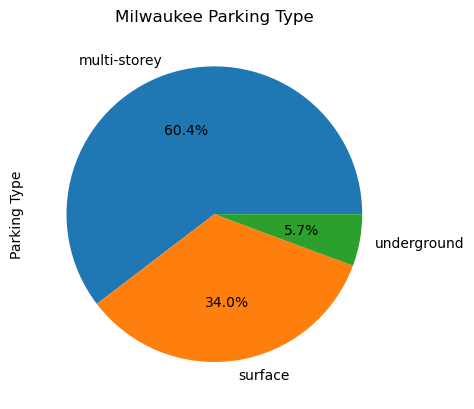

In [338]:
mil_pie = type_list[7].value_counts()
labels = type_list[7].unique()

plt.pie(mil_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Milwaukee Parking Type")

#save to output folder
plt.savefig("Output/Milwaukee_Pie.png", bbox_inches='tight')

plt.show()

## Philadelphia Parking Types

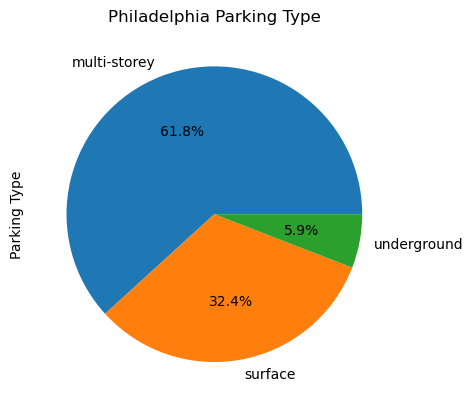

In [339]:
pa_pie = type_list[8].value_counts()
labels = type_list[8].unique()

plt.pie(pa_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Philadelphia Parking Type")

#save to output folder
plt.savefig("Output/Philadelphia_Pie.png", bbox_inches='tight')

plt.show()

## Phoenix Parking Types

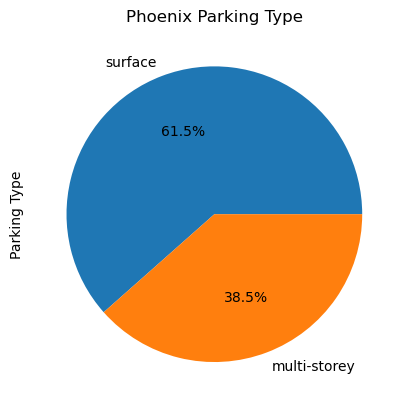

In [340]:
az_pie = type_list[9].value_counts()
labels = type_list[9].unique()

plt.pie(az_pie, labels=labels, autopct="%1.1f%%")
plt.ylabel("Parking Type")
plt.title("Phoenix Parking Type")

#save to output folder
plt.savefig("Output/Phoenix_Pie.png", bbox_inches='tight')

plt.show()